In [2]:

# Goal:
# Find the temperature T (°C) where the vapor pressure equals 700 kPa
# Equation: f(T) = 0.000002*T^3 - 0.0015*T^2 + 0.4*T - 25 = 0

import numpy as np
import matplotlib.pyplot as plt



In [4]:
#Define the nonlinear function
def f(T):
    return 0.000002*T**3 - 0.0015*T**2 + 0.4*T - 25


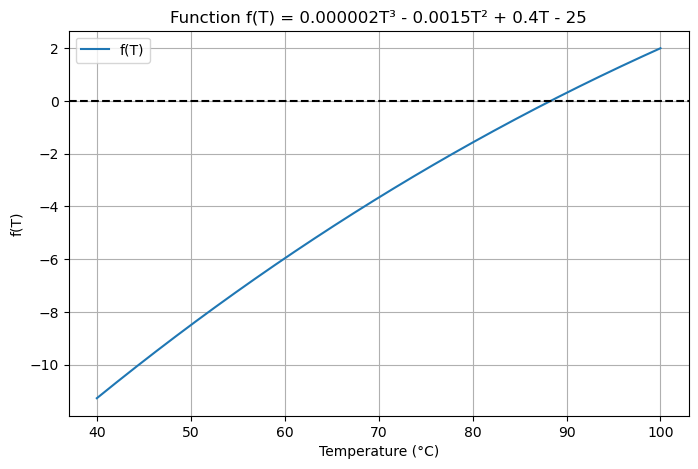

In [5]:

T_values = np.linspace(40, 100, 400)
f_values = f(T_values)

plt.figure(figsize=(8,5))
plt.plot(T_values, f_values, label='f(T)')
plt.axhline(0, color='black', linestyle='--')
plt.title("Function f(T) = 0.000002T³ - 0.0015T² + 0.4T - 25")
plt.xlabel("Temperature (°C)")
plt.ylabel("f(T)")
plt.legend()
plt.grid(True)
plt.show()


Iteration	T0		T1		T2		f(T2)
1		60.000000	80.000000	87.176685	-0.203941
2		80.000000	87.176685	88.243420	-0.008698
3		87.176685	88.243420	88.290944	-0.000052
4		88.243420	88.290944	88.291227	-0.000000
5		88.290944	88.291227	88.291227	-0.000000

✅ Converged to T ≈ 88.291227°C after 5 iterations.


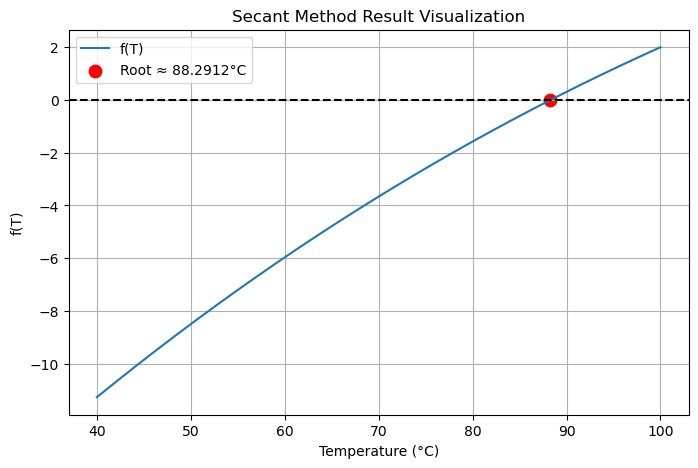

In [6]:
def secant_method(T0, T1, tolerance=1e-6, max_iterations=100):
    print("Iteration\tT0\t\tT1\t\tT2\t\tf(T2)")
    for i in range(max_iterations):
        f0 = f(T0)
        f1 = f(T1)
        
        
        if (f1 - f0) == 0:
            print("Division by zero detected. Try different initial guesses.")
            return None

        T2 = T1 - f1 * (T1 - T0) / (f1 - f0)
        f2 = f(T2)

        print(f"{i+1}\t\t{T0:.6f}\t{T1:.6f}\t{T2:.6f}\t{f2:.6f}")

        
        if abs(T2 - T1) < tolerance:
            print(f"\n✅ Converged to T ≈ {T2:.6f}°C after {i+1} iterations.")
            return T2

        # Update points
        T0, T1 = T1, T2
    
    print("\n❌ Did not converge within the maximum number of iterations.")
    return None


T0 = 60 
T1 = 80  

root = secant_method(T0, T1)


if root is not None:
    plt.figure(figsize=(8,5))
    plt.plot(T_values, f_values, label='f(T)')
    plt.axhline(0, color='black', linestyle='--')
    plt.scatter(root, f(root), color='red', s=80, label=f'Root ≈ {root:.4f}°C')
    plt.title("Secant Method Result Visualization")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("f(T)")
    plt.legend()
    plt.grid(True)
    plt.show()